In [1]:
import nbimporter
import util
import cv2
import numpy as np
from hough_lines_acc import hough_lines_acc
from hough_peaks import hough_peaks
from hough_lines_draw import hough_lines_draw

Importing Jupyter notebook from util.ipynb
Importing Jupyter notebook from hough_lines_acc.ipynb
Importing Jupyter notebook from hough_peaks.ipynb
Importing Jupyter notebook from hough_lines_draw.ipynb


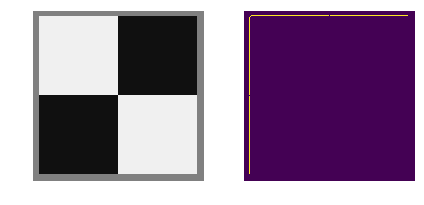

In [2]:
# 1

img = util.read_img('ps1-input0.png')
img_edges = cv2.Canny(img, 0, 0)
util.write_img('ps1-1-a-1.png', img_edges)

util.show_images_together(img, img_edges)

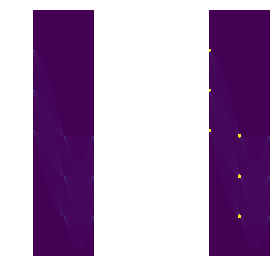

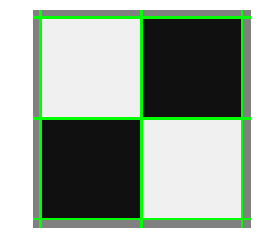

In [3]:
# 2

def normalize_accumulator(acc, normalized_min, normalized_max):
    min_val = np.amin(acc)
    max_val = np.amax(acc)
    acc_range = max_val - min_val
    if acc_range == 0: return acc
    normalized_range = normalized_max - normalized_min
    return normalized_min + (acc - min_val) * normalized_range / acc_range
    
def highlight_hough_peaks(normal_hough_acc, peaks):
    highlight_peaks = normal_hough_acc.copy()
    for peak in peaks:
        row, col = peak
        cv2.circle(highlight_peaks, (col, row), 5, (255,255,255), -1)
    return highlight_peaks

def accumulator_and_peaks(img_edges):
    normal_hough_acc = normalize_accumulator(H, 0, 255).astype('uint8')
    peaks = hough_peaks(normal_hough_acc, 10);
    highlight_peaks = highlight_hough_peaks(normal_hough_acc, peaks)
    return peaks, normal_hough_acc, highlight_peaks

H, rho, theta = hough_lines_acc(img_edges)
peaks, normal_hough_acc, highlight_peaks = accumulator_and_peaks(img_edges)
util.write_img('ps1-2-a-1.png', normal_hough_acc)
util.write_img('ps1-2-b-1.png', highlight_peaks)

util.show_images_together(normal_hough_acc, highlight_peaks)

img_edge_colored = hough_lines_draw(img, 'ps1-2-c-1.png', peaks, rho, theta)
util.show_img(img_edge_colored)

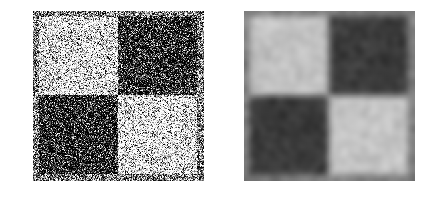

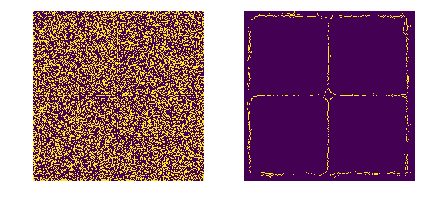

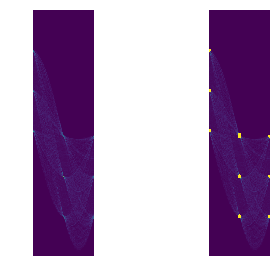

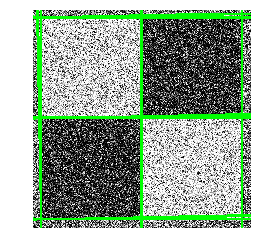

In [4]:
# 3

noisy_img = util.read_img('ps1-input0-noise.png')
smooth_img = cv2.GaussianBlur(noisy_img, (23, 23), 5)
util.write_img('ps1-3-a-1.png', smooth_img)

util.show_images_together(noisy_img, smooth_img)

noisy_edge_img = cv2.Canny(noisy_img, 20, 40)
smooth_edge_img = cv2.Canny(smooth_img, 20, 40)
util.write_img('ps1-3-b-1.png', noisy_edge_img)
util.write_img('ps1-3-b-2.png', smooth_edge_img)

util.show_images_together(noisy_edge_img, smooth_edge_img)

H, rho, theta = hough_lines_acc(smooth_edge_img)
peaks, normal_hough_acc, highlight_peaks = accumulator_and_peaks(smooth_edge_img)
util.write_img('ps1-3-c-1.png ', highlight_peaks)

util.show_images_together(normal_hough_acc, highlight_peaks)
img_edge_colored = hough_lines_draw(noisy_img, 'ps1-3-c-2.png', peaks, rho, theta)
util.show_img(img_edge_colored)